Deep Learning *-is subset of-* Machine Learning *-which is subset of-* Artificial Intelligence

Machine Learning: 

* Giving computers the ability to learn to make decisions from data
* Without being explicitly programmed

Types:

* Supervised learning
* Unsupervised learning
* Reinforcement learning
* Deep Learning

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples.

Reinforcement learning (RL) is an area of machine learning concerned with how software agents ought to take actions in an environment in order to maximize the notion of cumulative reward. <br >
-Draws inspiration from behavioral psychology 

# Supervised Learning

Predictor variables/features predict target variable
* Classification- target variable consists of categories
* Regression- target variable is continuous

Naming Conventions:
* Features = predictor variables = independent variables
* Target variable = dependent variable = response variable

## Classification

### Iris Dataset

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
iris = datasets.load_iris()

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [ ]:
type(1), type('hello')

(int, str)

In [ ]:
iris.data.shape

(150, 4)

In [ ]:
iris.feature_names

'sepal length (cm)'

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
x = iris.data
y = iris.target
x[:5] , y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]), array([0, 0, 0, 0, 0]))

In [ ]:
df = pd.DataFrame(x, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Scatter matrix

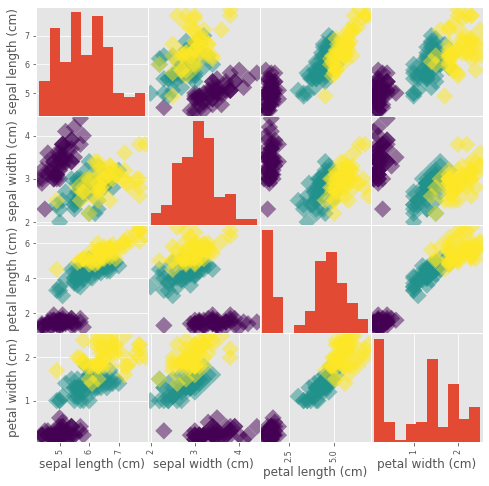

In [ ]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize=[8,8], s = 150, marker = 'D') #c for color
#scatter plot between features 
#distribution of features down diagonal

### Using scikit-learn - Fitting and Predicting



Scikit-learn fit and predict <br >
-All ML models are implemented as ppython classes
* Implement algorithm for learning and predictin
* Store the information learned form the data
-Training a model on the data = 'fitting a model to the data 

```
.fit() 
```
-Predicting the labels of new data


```
.predict()
```





k-Nearest Neighbors: <br >

Predicts the label of a data point by 
* looking at the k closest labeled data points 
* taking a majority vote

Creates a set of decision boundaries

Predicts a categorical variable based on several continuous variables. Can't be any missing data.

Model complexity:
* Larger k = smoother decision boundary = less complex model
* Smaller k = more complex model = can lead to overfitting

**Train/test split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = iris.data
y = iris.target
X[:5] , y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]), array([0, 0, 0, 0, 0]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,                #set test size to 30%
                                                    random_state = 21, stratify = y)    #stratify makes sure labels are evenly distributed between possible target values

**Fitting a classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Instantiate kNeighbors classifier, save it inside object

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6) # uses 6 as k

In [ ]:
type(knn)

sklearn.neighbors._classification.KNeighborsClassifier

In [ ]:
knn.fit(X_train, y_train) 
# fit method
# pass features as numpy array
# pass target values as numpy array

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

**Prediction**

In [ ]:
prediction = knn.predict(X_test)
prediction

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2,
       1])

In [ ]:
iris.target_names[prediction]
#actual names of predicted values

array(['virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'setosa', 'setosa', 'versicolor', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor'], dtype='<U10')

### Measuring Performance

* Accuracy = Fraction of correct predictions

In [ ]:
knn.score(X_test, y_test)
#accuracy percentage

0.9555555555555556

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9555555555555556

In [ ]:
pd.DataFrame({'Prediction' :prediction, 'Ground Truth' : y_test}).head()
#To compare them side by side ^


,Prediction,Ground Truth
0,2,2
1,1,2
2,2,2
3,2,2
4,1,1


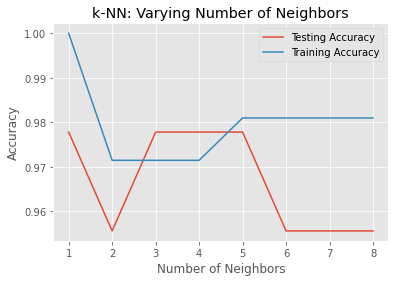

In [ ]:
9# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

^Training accuracy is initially higher, but goes down due to overfitting

## Regression

### Boston Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
bos = load_boston()

In [ ]:
bos.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
bos['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
boston = pd.DataFrame(bos.data)
boston.columns = bos['feature_names']
boston['MEDV'] = bos['target'] # adding target variable to data
boston


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Creating feature and target arrays

In [ ]:
X = boston.drop('MEDV', axis = 1).values
y = boston['MEDV'].values
X, y[:10]

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9]))

Predicting values from a single feature


In [ ]:
X_rooms = X[:,5]
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)
X_rooms[:5], y[:5]

(array([[6.575],
        [6.421],
        [7.185],
        [6.998],
        [7.147]]), array([[24. ],
        [21.6],
        [34.7],
        [33.4],
        [36.2]]))

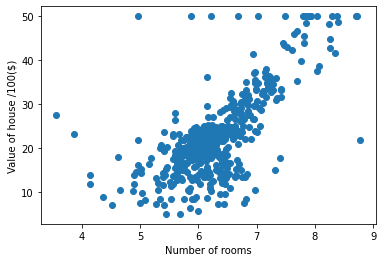

In [ ]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /100($)')
plt.xlabel('Number of rooms')
plt.show()

### Fitting regression model

#### Single Feature

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(X = X_rooms, y = y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)
prediction_space[:5]

array([[3.561     ],
       [3.6675102 ],
       [3.77402041],
       [3.88053061],
       [3.98704082]])

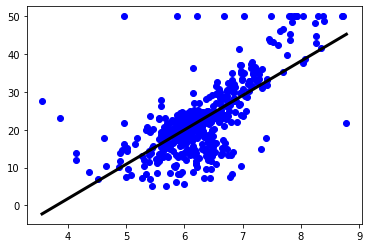

In [ ]:
plt.scatter(X_rooms, y, color = 'blue')
plt.plot(prediction_space, reg.predict(prediction_space), color = 'black', linewidth = 3)
plt.show()

#### Multiple Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = reg_all.predict(X_test)
y_pred[:5]

array([[28.64896005],
       [36.49501384],
       [15.4111932 ],
       [25.40321303],
       [18.85527988]])

Evaluating model:

.score() returns r squared value


In [ ]:
reg_all.score(X_test, y_test)

0.7112260057484974

Root mean squared error:

In [ ]:
from sklearn.metrics import mean_squared_error

print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.7112260057484974
Root Mean Squared Error: 4.638689926172788


### Cross-validation

Motivation:
* Model performance is dependent on the way the data is split
* Not always representative of the model's ability to generalize

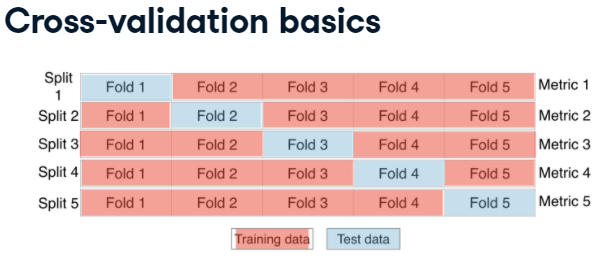

Get 5 values for r^2 

5 folds = 5-fold CV

In [ ]:
from sklearn.model_selection import cross_val_score

.cross_val_score()

In [ ]:
reg = LinearRegression()
cv_results = cross_val_score(reg, X,y, cv = 5)

In [ ]:
cv_results

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [ ]:
np.mean(cv_results)

0.35327592439588484

### Regularized regression

Why regularize?
* Linear regression minimizes a loss function and it chooses a coefficient for each feature variable
* Large coefficients can lead to overfitting
* Penalizing large coefficients: Regularization

Ridge regression - loss function that penalizes large coef <br > 
-Alpha Parameter - input to function similar to picking k in k-NN (Hyperparameter tuning)
* Alpha controls model complexity
  * Alpha = 0: We get back OLS (can lead to overfitting)
  * Very high alpha: heavily penalizes large coef, can lead to underfitting

Ridge regression in scikit-learn

In [ ]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
ridge = Ridge(alpha = 0.1, normalize = True)

In [ ]:
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)
#model actually performs worse

0.6996938275127313

Lasso regression in scikit-learn

Shrinks the coefficients of less important features to exactly 0

In [ ]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)
#also performs worse, overfitting not seeming to be issue in model

0.595022953532855

Coefficients

In [ ]:
names = boston.drop('MEDV', axis  = 1).columns
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X,y).coef_
lasso_coef

array([-0.09789363,  0.04921111, -0.03661906,  0.95519003, -0.        ,
        3.70320175, -0.01003698, -1.16053834,  0.27470721, -0.01457017,
       -0.77065434,  0.01024917, -0.56876914])

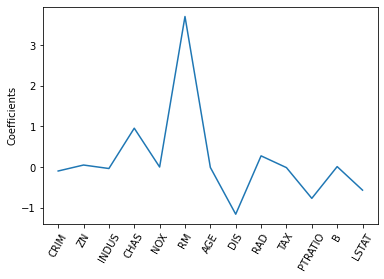

In [ ]:
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation  = 60)
_ = plt.ylabel('Coefficients')
plt.show()
# most important variable for housing price is number of rooms - makes sense